In [1]:
from scipy.io import loadmat
import numpy as np

data = loadmat("data/S102_run03.nirs")

print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'SD', 'ml', 'd', 't', 'dStd', 'aux', 's', 'tdml', 'systemInfo'])


In [11]:
# inspect the existing S matrix s
import numpy as np
from scipy.io import loadmat

data = loadmat("data/S102_run03.nirs")
s_old = data["s"]
t = data["t"].flatten()
aux = data["aux"]

print("t:", t.shape, "aux:", aux.shape, "s_old:", s_old.shape)

# Count events per column (rising edges in each s column)
def count_onsets(col):
    col = np.asarray(col).astype(float)
    return np.sum((col[1:] > 0) & (col[:-1] == 0))

for j in range(s_old.shape[1]):
    print(f"s_old col {j}: onsets =", count_onsets(s_old[:, j]))


t: (16025,) aux: (16025, 8) s_old: (16025, 1)
s_old col 0: onsets = 0


In [2]:
aux = data['aux']
print(aux.shape)

(16025, 8)


In [3]:
t = data['t'].flatten()
print(t.shape)

sfreq = 1 / (t[1]-t[0])
print("Sampling frequency: ", sfreq)

(16025,)
Sampling frequency:  25.0


In [4]:
print("AUX shape:", aux.shape)

aux_channel = aux[:, 0]

print("First 200 samples:")
print(aux_channel[:200])

print("Unique values:")
print(np.unique(aux_channel))


AUX shape: (16025, 8)
First 200 samples:
[0.04714678 0.04501068 0.0469942  0.04668904 0.04668904 0.04470552
 0.04638389 0.04363747 0.04440037 0.04623131 0.04638389 0.0469942
 0.04638389 0.04638389 0.04562099 0.04668904 0.04424779 0.04668904
 0.04729936 0.04455294 0.04546842 0.04317974 0.04638389 0.04409521
 0.04684162 0.04348489 0.04745194 0.04409521 0.04455294 0.04745194
 0.04562099 0.04714678 0.04668904 0.04409521 0.04592615 0.04668904
 0.04409521 0.0469942  0.04684162 0.04653647 0.04653647 0.0448581
 0.04455294 0.0469942  0.04638389 0.04653647 0.04409521 0.04363747
 0.04607873 0.04729936 0.04470552 0.04623131 0.04668904 0.04668904
 0.04333232 0.04455294 0.04546842 0.04409521 0.04714678 0.04623131
 0.04379005 0.04623131 0.04653647 0.04623131 0.04684162 0.04440037
 0.04653647 0.04394263 0.04394263 0.04638389 0.04348489 0.04668904
 0.04653647 0.04379005 0.04668904 0.0469942  0.04684162 0.04668904
 0.04562099 0.04668904 0.04379005 0.04684162 0.04531584 0.04455294
 0.04684162 0.04409521 

In [5]:
aux_channel = aux[:, 0]
threshold = 1.0
digital = aux_channel > threshold

In [6]:
events = []

for i in range(1, len(digital)):
    if digital[i] and not digital[i-1]:
        events.append(i)

events = np.array(events)

print("Detected events:", len(events))
print(events[:10])

Detected events: 40
[ 961 1566 1830 2290 2983 3195 3540 3846 4204 4554]


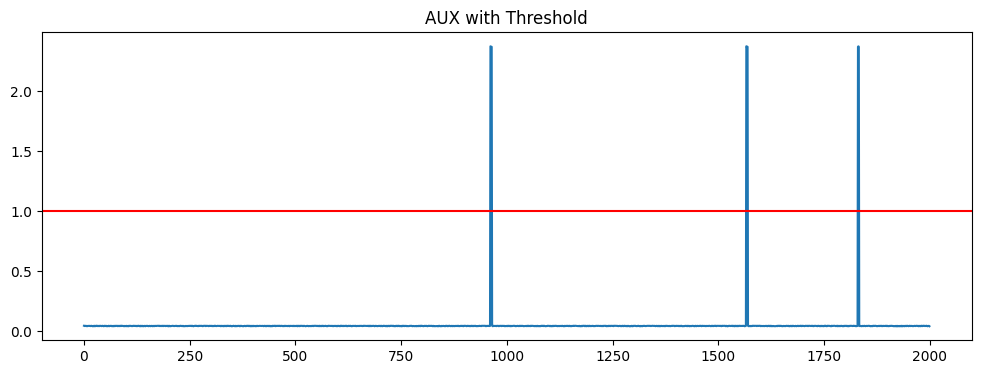

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(aux_channel[:2000])
plt.axhline(1.0, color='r')
plt.title("AUX with Threshold")
plt.show()


In [8]:
for ch in range(aux.shape[1]):
    print(f"Channel {ch} unique max:", np.max(aux[:, ch]))

Channel 0 unique max: 2.375495880378395
Channel 1 unique max: 0.0205981080256332
Channel 2 unique max: 0.050503509307293255
Channel 3 unique max: 0.04058590173939579
Channel 4 unique max: 0.04668904485810192
Channel 5 unique max: 0.047299359169972535
Channel 6 unique max: 0.04745193774794019
Channel 7 unique max: 0.04699420201403723


In [9]:
n_times = len(aux_channel)

S = np.zeros((n_times, 1))

for onset in events:
    S[onset] = 1

print("S shape:", S.shape)


S shape: (16025, 1)


In [10]:
print(S)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


### Testing after trying aux_to_s_matrix.py ###